We retrieve the data Adam pickled after preprocessing.

In [20]:
import gensim
import numpy as np
import matplotlib.pyplot as plt

In [14]:
desc4 = np.load('/Users/willnunn/Desktop/DST/Assessment-3-Bill-Adam/data/processed/formatted1.npy', allow_pickle=True)

In [15]:
len(desc4)

167634

By chance I took a look at the `formatted1.npy` file and some entries looked only a few words long. I'm therefore going to check the lengths.

In [16]:
lengths = []

for d in desc4:
    lengths.append(len(d))

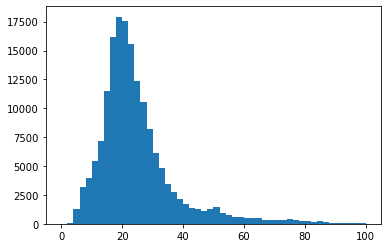

In [17]:
plt.hist(lengths, bins = 50, range=(0,100))
plt.show()

This looks much better than I'd anticipated, I think we're ok to continue with the data as is.

In [19]:
print(desc4[0])

['ipinputc', 'bsdderived', 'tcpip', 'implementation', 'allow', 'remote', 'attacker', 'cause', 'denial', 'service', 'crash', 'hang', 'craft', 'packet']


In [21]:
vocab = gensim.corpora.Dictionary(desc4)
doc_word_matrix = [vocab.doc2bow(doc) for doc in desc4]

It's worth noting that the `doc_word_matrix` is stored in a sparse way by default.

In [29]:
print(doc_word_matrix[3])

[(15, 1), (20, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1)]


We retrieve the Latent Dirichlet Allocation model from `gensim`.

In [30]:
LDA = gensim.models.ldamodel.LdaModel

We fit the model.

In [31]:
lda_model = LDA(corpus=doc_word_matrix, id2word=vocab, num_topics=8)

This took about one minute- we should be able to comfortably run LDA for a range of topic numbers.